In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


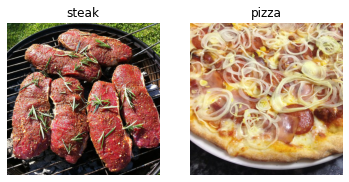

In [12]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range= 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip= True
)

train_datagen = ImageDataGenerator(rescale= 1/255.)

test_datagen = ImageDataGenerator(rescale= 1/255.)

In [14]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size= 30,
    class_mode = "binary",
    shuffle= False
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size= 30,
    class_mode = "binary",
    shuffle= False
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size= 30,
    class_mode = "binary"
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
images, lables = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

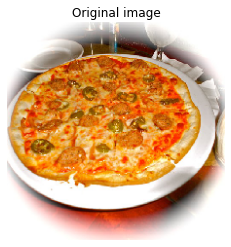

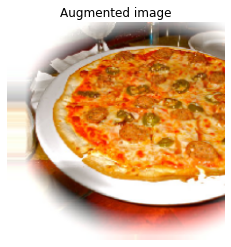

In [16]:
random_number = random.randint(0, 30)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_6 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_6 = model_6.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)